### Importing Required Libraries

In [70]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout,Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

### Downloading data

In [5]:
data = fashion_mnist.load_data() 

4423680/4422102 [==============================] - 6s 1us/step


In [14]:
help(datasets)

Help on package tensorflow.keras.datasets in tensorflow.keras:

NAME
    tensorflow.keras.datasets - Public API for tf.keras.datasets namespace.

PACKAGE CONTENTS
    boston_housing (package)
    cifar10 (package)
    cifar100 (package)
    fashion_mnist (package)
    imdb (package)
    mnist (package)
    reuters (package)

FILE
    c:\users\raghavendra\.conda\envs\tensorflow\lib\site-packages\tensorflow_core\python\keras\api\_v2\keras\datasets\__init__.py




### Extracting data

In [46]:
(x_train,y_train),(x_test,y_test) = data # data available in the show code format`
z = 0 # which later used for normalising it only one time

In [47]:
labels_dict={}
labels = '''T-shirt/top
Trouser/pants
Pullover shirt
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot
'''.split('\n')[:-1]
print(len(labels),labels)

for i in range(len(labels)):
    labels_dict[i] = labels[i]
    
labels_dict

10 ['T-shirt/top', 'Trouser/pants', 'Pullover shirt', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


{0: 'T-shirt/top',
 1: 'Trouser/pants',
 2: 'Pullover shirt',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

### Functions Which are Called Reccursively

In [63]:
def shape():# checking the shape of train and test data sets
    return x_train.shape,y_train.shape,x_test.shape,y_test.shape 

def max_min():
    return x_train.max(),x_test.max(),x_train.min(),x_test.min()

### Checking Shape Of Dataset

In [62]:
print(shape())

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))


### Having a Glance Of Data

Sneaker


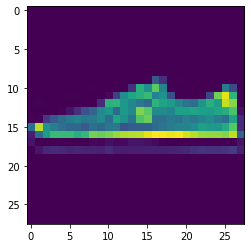

In [49]:
def glance(num):
    
    print(labels_dict[y_train[num]])
    plt.imshow(x_train[num])
 
glance(14)

## Data Preprocessing

### Checking For min and max values in Data to  Normalise

In [61]:
print(max_min())

(1.0, 1.0, 0.0, 0.0)


##### Note: Don't execute this more than one time ,

In [58]:
if  z == 0:# if it is already executed then it means data is Normalised else not needed Normalise it again
    x_train = x_train/ 255
    x_test  = x_test / 255
    z += 1

print("Checking whether data changed after normalising it:",end=" ")
x_train.max(),x_test.max(),x_train.min(),x_test.min()

Checking whether data changed after normalising it: 

(1.0, 1.0, 0.0, 0.0)

In [64]:
shape()

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### reshaping x_train and x_test and Categorising y data


In [68]:
x_train = x_train.reshape(-1,28,28,1)
x_test  = x_test .reshape(-1,28,28,1)

y_train_cat = to_categorical(y_train)
y_test_cat  = to_categorical(y_test)

print(shape())
print(y_train_cat.shape,y_test_cat.shape)

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))
(60000, 10) (10000, 10)


## Creating Model

In [74]:
model = Sequential()

model.add(Conv2D(filters=256,kernel_size=(2,2),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=512,kernel_size=(2,2),padding='same',activation='relu'))
model.add(Dropout(0.4))

model.add(Conv2D(filters=1024,kernel_size=(2,2),padding='same',activation='relu'))
model.add(Dropout(0.5))

model.add(Conv2D(filters=256,kernel_size=(2,2),padding='same',activation='relu'))
model.add(Dropout(0.4))

model.add(Conv2D(filters=128,kernel_size=(2,2),padding='same',activation='relu'))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [75]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 256)       1280      
_________________________________________________________________
dropout_17 (Dropout)         (None, 28, 28, 256)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 512)       524800    
_________________________________________________________________
dropout_18 (Dropout)         (None, 28, 28, 512)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 1024)      2098176   
_________________________________________________________________
dropout_19 (Dropout)         (None, 28, 28, 1024)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 256)      

#### Early Stopping , is used to prevent from Overfitting

In [77]:
es = EarlyStopping(monitor = 'val_loss',patience = 5, mode = 'min')

In [ ]:
model.fit(x=x_train,y=y_train_cat,callbacks=[es],batch_size=(64),epochs=300,validation_data=(x_test,y_test_cat))

Train on 60000 samples, validate on 10000 samples
Epoch 1/300
60000/60000 [==============================] - 15702s 262ms/sample - loss: 0.9938 - accuracy: 0.6284 - val_loss: 0.4661 - val_accuracy: 0.8251
Epoch 2/300
24000/60000 [===========>..................] - ETA: 1:29:03 - loss: 0.7110 - accuracy: 0.7262